In [1]:
# Import Package
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_classif

# Import Data

data = pd.read_excel("GermanCreditData.xlsx")

SyntaxError: invalid syntax (__init__.py, line 1187)

In [17]:
# Install the Scorecard Model Algorithm Package
!pip install scorecardpy
import scorecardpy as sc

In [18]:
data.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
0,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
1,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
3,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
4,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Checking   1000 non-null   int64 
 1   Duration   1000 non-null   int64 
 2   History    1000 non-null   int64 
 3   Purpose    1000 non-null   object
 4   Amount     1000 non-null   int64 
 5   Savings    1000 non-null   int64 
 6   Emploed    1000 non-null   int64 
 7   Installp   1000 non-null   int64 
 8   marital    1000 non-null   int64 
 9   Coapp      1000 non-null   int64 
 10  Resident   1000 non-null   int64 
 11  Property   1000 non-null   int64 
 12  Age        1000 non-null   int64 
 13  Other      1000 non-null   int64 
 14  housing    1000 non-null   int64 
 15  Existcr    1000 non-null   int64 
 16  Job        1000 non-null   int64 
 17  Depends    1000 non-null   int64 
 18  Telephone  1000 non-null   int64 
 19  Foreign    1000 non-null   int64 
 20  Bad        1000 non-null   int6

In [20]:
data.shape

(1000, 22)

In [21]:
# Data Cleaning

data.isnull().values.sum()

0

In [22]:
data.duplicated().sum()

0

In [23]:
data.describe()

,Checking,Duration,History,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,...,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000,0.300000,0.700000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,...,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487,0.458487
min,1.000000,4.000000,0.00000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,...,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,...,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,4.000000,24.000000,4.00000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,...,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,4.00000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,...,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [24]:
# Since the columns 'Bad' and 'Good' show the same values differently, we can remove the 'Bad' column to remove confusion
data = data.drop('Bad', 1)

In [25]:
data.Purpose.value_counts()

3    280
0    234
2    181
1    103
9     97
6     50
5     22
X     12
4     12
8      9
Name: Purpose, dtype: int64

In [26]:
# Since we have some 'X' values in this columns, we need to replace it with 'Other' cateogory i.e '9' for better analysis
data['Purpose'].replace('X','9',inplace=True)

In [27]:
data.Purpose.value_counts()

3    280
0    234
2    181
1    103
9     97
6     50
5     22
9     12
4     12
8      9
Name: Purpose, dtype: int64

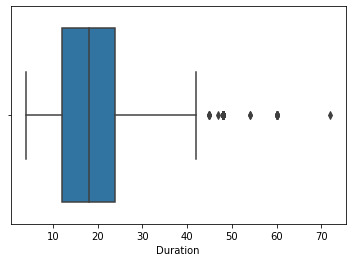

In [28]:
sns.boxplot(data['Duration'])

In [29]:
data[data.Duration >=60].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
# Removing Outliers
data.drop(data[(data['Duration'] >= 60)].index, inplace=True)

In [ ]:
sns.boxplot(data['Existcr'])

In [ ]:
data[data.Existcr >=4].value_counts()

In [ ]:
sns.boxplot(data['Depends'])

In [ ]:
data[data.Depends >=2].value_counts()

In [ ]:
sns.boxplot(data['Installp'])

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
data[data.Age >=70].value_counts()

In [ ]:
# Removing Outliers
data.drop(data[(data['Age'] >= 70)].index, inplace=True)

In [ ]:
sns.boxplot(data['Amount'])

In [ ]:
data[data.Amount >=17500].value_counts()

In [ ]:
# Removing Outliers
data.drop(data[(data['Amount'] >= 17500)].index, inplace=True)

In [30]:
# It is clear from these observations that there are certain outliers that need to be removed from the columns: DURATION, AMOUNT, AGE since their max values are quite
# large compartively to the mean values of these columns. Likewise, the boxplots also clearly show some values allowing for discrepency in the data

In [31]:
data['Checking'] = data['Checking'].values.astype(str)
data['History'] = data['History'].values.astype(str)
data['Purpose'] = data['Purpose'].values.astype(str)
data['Savings'] = data['Savings'].values.astype(str)
data['Emploed'] = data['Emploed'].values.astype(str)
data['marital'] = data['marital'].values.astype(str)
data['Property'] = data['Property'].values.astype(str)
data['Other'] = data['Other'].values.astype(str)
data['housing'] = data['housing'].values.astype(str)
data['Job'] = data['Job'].values.astype(str)
data['Telephone'] = data['Telephone'].values.astype(str)
data['Foreign'] = data['Foreign'].values.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Checking   1000 non-null   object
 1   Duration   1000 non-null   int64 
 2   History    1000 non-null   object
 3   Purpose    1000 non-null   object
 4   Amount     1000 non-null   int64 
 5   Savings    1000 non-null   object
 6   Emploed    1000 non-null   object
 7   Installp   1000 non-null   int64 
 8   marital    1000 non-null   object
 9   Coapp      1000 non-null   int64 
 10  Resident   1000 non-null   int64 
 11  Property   1000 non-null   object
 12  Age        1000 non-null   int64 
 13  Other      1000 non-null   object
 14  housing    1000 non-null   object
 15  Existcr    1000 non-null   int64 
 16  Job        1000 non-null   object
 17  Depends    1000 non-null   int64 
 18  Telephone  1000 non-null   object
 19  Foreign    1000 non-null   object
 20  Good       1000 non-null   int6

In [32]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [33]:
# Question 1 : Split dataset to <=12 months and >12 months

data1 = data[data.Duration <= 12]
data2 = data[data.Duration > 12]
data1.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
8,4,12,2,3,3059,4,4,2,1,1,...,1,61,3,2,1,2,1,1,1,1
10,2,12,2,0,1295,1,2,3,2,1,...,3,25,3,1,1,3,1,1,1,0
12,2,12,2,3,1567,1,3,1,2,1,...,3,22,3,2,1,3,1,2,1,1


In [34]:
data2.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0
5,4,36,2,6,9055,5,3,2,3,1,...,4,35,3,3,1,2,2,2,1,1
6,4,24,2,2,2835,3,5,3,3,1,...,2,53,3,2,1,3,1,1,1,1


In [35]:
data.columns

Index(['Checking', 'Duration', 'History', 'Purpose', 'Amount', 'Savings',
       'Emploed', 'Installp', 'marital', 'Coapp', 'Resident', 'Property',
       'Age', 'Other', 'housing', 'Existcr', 'Job', 'Depends', 'Telephone',
       'Foreign', 'Good'],
      dtype='object')

In [36]:
data.shape

(1000, 21)

In [37]:
data1.shape

(359, 21)

In [38]:
# Feature filter and make target variable "0/1"
data1 = sc.var_filter(data1, y="Good")

[INFO] filtering variables ...


In [39]:
# Question 2 : Split the data to Train and Test set
# Getting Independent and Dependent Variables for Subset 1

x1 = data1.loc[:,data1.columns != 'Good']
y1 = data1.loc[:,data1.columns == 'Good']

In [40]:
# Splitting Data Subset 1 
# Divide the data into Train and Test (7:3)

from sklearn.model_selection import train_test_split
x1_train1, x1_test1, y1_train1, y1_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

# Checking the Shapes

print("Shape of x1_train1 :", x1_train1.shape)
print("Shape of y1_train :", y1_train1.shape)
print("Shape of x1_test :", x1_test1.shape)

Shape of x1_train1 : (251, 17)
Shape of y1_train : (251, 1)
Shape of x1_test : (108, 17)


In [41]:
data2.shape

(641, 21)

In [42]:
# Getting Independent and Dependent Variables for Subset 2

x2 = data2.loc[:,data2.columns != 'Good']
y2 = data2.loc[:,data2.columns == 'Good']

In [43]:
# Splitting Data 2
# Divide the data into Train and Test (7:3)

from sklearn.model_selection import train_test_split
x2_train2, x2_test2, y2_train2, y2_test2 = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

# Checking the Shapes

print("Shape of x2_train2 :", x2_train2.shape)
print("Shape of y2_train :", y2_train2.shape)
print("Shape of x2_test :", x2_test2.shape)

Shape of x2_train2 : (448, 20)
Shape of y2_train : (448, 1)
Shape of x2_test : (193, 20)


In [44]:
# Question 3 : Feature Selection

# Subset 1 : Data1 <= 12 months
x1_train1_num = x1_train1.select_dtypes('number')
x1_train1_cat = x1_train1.select_dtypes('object')
x1_train1_num

,Existcr,Coapp,Installp,Age,Duration,Amount,Depends
723,1,1,4,66,9,790,1
486,1,1,2,52,12,3077,1
439,1,1,4,26,12,609,1
769,2,1,2,63,12,1655,1
356,1,2,1,49,12,2331,1
...,...,...,...,...,...,...,...
871,2,1,1,46,6,1343,2
478,1,1,3,39,12,1037,1
277,1,1,2,49,12,1262,1
117,2,2,2,27,10,2132,1


In [45]:
x1_train1_cat

,housing,marital,Emploed,History,Foreign,Savings,Other,Purpose,Checking,Property
723,2,2,3,2,1,3,3,3,2,1
486,2,3,3,2,1,1,3,3,4,3
439,2,2,2,1,1,1,3,9,3,1
769,2,3,5,4,1,1,3,3,4,1
356,2,3,5,4,1,5,3,3,4,1
...,...,...,...,...,...,...,...,...,...,...
871,2,3,5,4,2,1,3,0,3,1
478,2,3,4,2,1,2,3,9,2,1
277,2,1,5,2,1,5,3,2,1,2
117,1,2,2,4,2,5,3,2,1,1


In [46]:
# Anova Test

fs = SelectKBest(score_func=f_classif,k=2)
fit = fs.fit(x1_train1_num,y1_train1)
x1_train_fs = fit.transform(x1_train1_num)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# Select Age, Duration

Feature 0: 4.049865
Feature 1: 3.900442
Feature 2: 4.234902
Feature 3: 3.062692
Feature 4: 5.814731
Feature 5: 0.362483
Feature 6: 3.015535


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# Chi-Square Test

test = SelectKBest(chi2,k='all')
fit = test.fit(x1_train1_cat,y1_train1)
x1_train1_test = fit.transform(x1_train1_cat)

for i in range(len(test.scores_)):
	print('Feature %d: %f' % (i, test.scores_[i]))
 
# Select History, Checking

Feature 0: 0.098361
Feature 1: 0.499176
Feature 2: 1.191288
Feature 3: 9.826464
Feature 4: 0.269459
Feature 5: 9.044882
Feature 6: 0.713046
Feature 7: 0.272862
Feature 8: 15.019905
Feature 9: 7.304511


In [48]:
# Subset 2 : Data1 > 12 months
x2_train2_num = x2_train2.select_dtypes('number')
x2_train2_cat = x2_train2.select_dtypes('object')
x2_train2_num

,Duration,Amount,Installp,Coapp,Resident,Age,Existcr,Depends
509,39,8588,4,1,2,45,1,1
183,24,3777,4,1,4,50,1,1
414,24,1381,4,1,2,35,1,1
677,72,5595,2,1,2,24,1,1
1,48,5951,2,1,2,22,1,1
...,...,...,...,...,...,...,...,...
14,15,1403,2,1,4,28,1,1
594,24,1358,4,1,3,40,1,1
328,36,4473,4,1,2,31,1,1
984,24,2028,2,1,2,30,2,1


In [49]:
x2_train2_cat

,Checking,History,Purpose,Savings,Emploed,marital,Property,Other,housing,Job,Telephone,Foreign
509,4,2,1,2,5,3,3,3,2,4,2,1
183,4,4,2,4,3,3,1,3,2,3,2,1
414,1,2,0,5,3,2,2,3,2,3,1,1
677,2,2,3,2,3,4,3,3,2,3,1,1
1,2,2,3,1,3,2,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,2,0,1,3,2,3,3,1,3,1,1
594,1,1,9,5,5,3,3,2,2,4,2,1
328,3,2,3,1,5,3,3,3,2,3,1,1
984,4,4,2,1,4,3,2,3,2,2,1,1


In [50]:
# Anova Test

fs = SelectKBest(score_func=f_classif,k=2)
fit = fs.fit(x2_train2_num,y2_train2)
x2_train2_fs = fit.transform(x2_train2_num)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# Select Duration

Feature 0: 20.274951
Feature 1: 10.389532
Feature 2: 0.552631
Feature 3: 0.021844
Feature 4: 0.335520
Feature 5: 0.172007
Feature 6: 0.275204
Feature 7: 3.067421


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# Chi-Square Test

test = SelectKBest(chi2,k='all')
fit = test.fit(x2_train2_cat,y2_train2)
x2_train2_test = fit.transform(x2_train2_cat)

for i in range(len(test.scores_)):
	print('Feature %d: %f' % (i, test.scores_[i]))
 
# Select History, Checking, Savings

Feature 0: 41.236645
Feature 1: 9.979680
Feature 2: 0.639871
Feature 3: 21.990306
Feature 4: 2.317014
Feature 5: 0.711660
Feature 6: 1.687528
Feature 7: 0.059904
Feature 8: 0.087117
Feature 9: 0.000462
Feature 10: 0.656135
Feature 11: 0.008582


In [52]:
# Question 4 

# Subset 1
x1_train1 = x1_train1[['Age','Duration','History','Checking']]
x1_test1 = x1_test1[['Age','Duration','History','Checking']]

# Subset 2
x2_train2 = x2_train2[['Duration','History','Checking','Savings']]
x2_test2 = x2_test2[['Duration','History','Checking','Savings']]

In [53]:
# Binning

from scorecardpy import woebin

set1 = pd.concat([x1_train1,y1_train1],axis=1)
set2 = pd.concat([x2_train2,y2_train2],axis=1)

#binning for subset1
bins1 = sc.woebin(set1, y='Good')

#binning for subset2
bins2 = sc.woebin(set2, y='Good')

[INFO] creating woe binning ...
[INFO] creating woe binning ...


In [54]:
set2

,Duration,History,Checking,Savings,Good
509,39,2,4,2,1
183,24,4,4,4,1
414,24,2,1,5,0
677,72,2,2,2,0
1,48,2,2,1,0
...,...,...,...,...,...
14,15,2,1,1,1
594,24,1,1,5,0
328,36,2,3,1,1
984,24,4,4,1,1


{'Checking': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'History': <Figure size 432x288 with 2 Axes>}

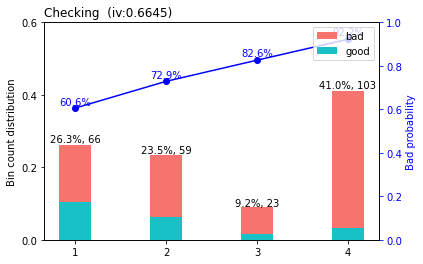

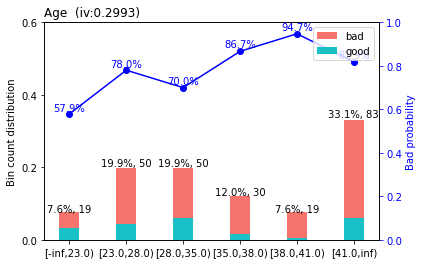

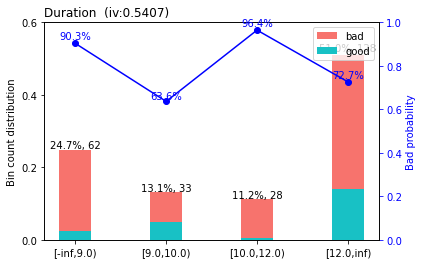

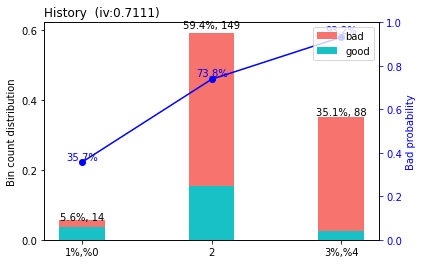

In [55]:
# Graphically display the binning results for each variable subset 1

sc.woebin_plot(bins1)

{'Savings': <Figure size 432x288 with 2 Axes>,
 'Checking': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'History': <Figure size 432x288 with 2 Axes>}

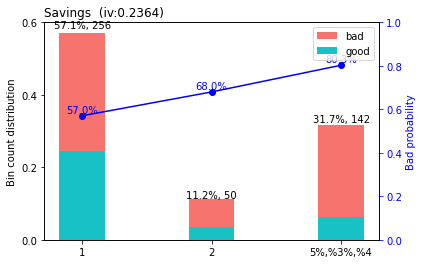

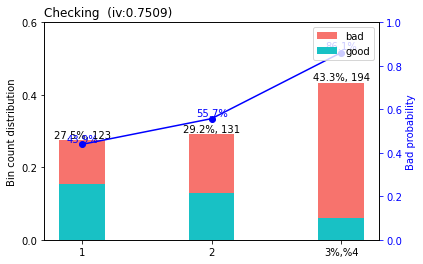

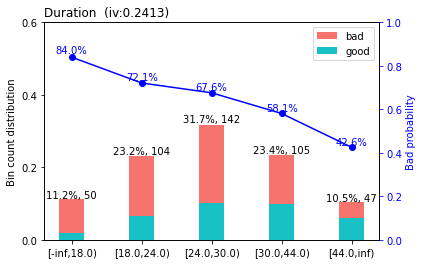

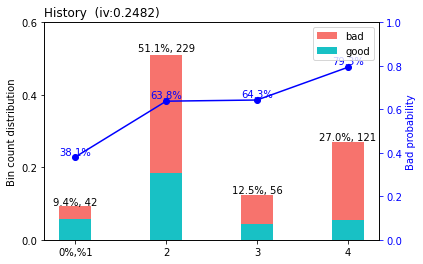

In [56]:
sc.woebin_plot(bins2)

In [57]:
def get_history(history):
    
    
    if history in ['3', '4']:
        return '3,4'
    elif history in ['0', '1']:
        return '0,1'
    else:
        return history    
   

In [58]:
def get_saving(saving):
    
    
    if saving in ['3', '4']:
        return '3,4'
    elif saving in ['1', '2']:
        return '1,2'
    else:
        return saving 

In [59]:
def get_age(age):
    
    if age <= 25:
        return '0_25'
    elif age >= 26 and age <= 28:
        return '26-28'
    elif age >= 29 and age <= 34:
        return '29-34' 
    else:
        return '34above'


In [60]:
def get_duration(duration):
    
    if duration <= 7:
        return '0_7'
    elif duration >= 8 and duration <= 12:
        return '8-12'
    elif duration >= 13 and duration <= 20:
        return '13-20'
    elif duration >= 21 and duration <= 46:
        return '21-46'
    else:
        return '46above'

In [61]:
x1_train1['History'] = x1_train1['History'].apply(get_history)
x1_train1['Age'] = x1_train1['Age'].apply(get_age)
x1_train1['Duration'] = x1_train1['Duration'].apply(get_duration)
x1_test1['History'] = x1_test1['History'].apply(get_history)
x1_test1['Age'] = x1_test1['Age'].apply(get_age)
x1_test1['Duration'] = x1_test1['Duration'].apply(get_duration)


In [62]:
x2_train2['History'] = x2_train2['History'].apply(get_history)
x2_train2['Savings'] = x2_train2['Savings'].apply(get_saving)
x2_train2['Duration'] = x2_train2['Duration'].apply(get_duration)
x2_test2['History'] = x2_test2['History'].apply(get_history)
x2_test2['Savings'] = x2_test2['Savings'].apply(get_saving)
x2_test2['Duration'] = x2_test2['Duration'].apply(get_duration)


In [63]:
x2_train2

,Duration,History,Checking,Savings
509,21-46,2,4,"1,2"
183,21-46,"3,4",4,"3,4"
414,21-46,2,1,5
677,46above,2,2,"1,2"
1,46above,2,2,"1,2"
...,...,...,...,...
14,13-20,2,1,"1,2"
594,21-46,"0,1",1,5
328,21-46,2,3,"1,2"
984,21-46,"3,4",4,"1,2"


In [64]:
# Imbalanced Data

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x1_train1,y1_train1 = os.fit_resample(x1_train1,y1_train1)
x2_train2,y2_train2 = os.fit_resample(x2_train2,y2_train2)

In [65]:
#dummy variables

x1_train1=pd.get_dummies(x1_train1)
x1_test1=pd.get_dummies(x1_test1)

x2_train2=pd.get_dummies(x2_train2)
X2_test2=pd.get_dummies(x2_test2)


In [66]:
# Logistic Regression Model1

from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(C=0.9, solver='saga', n_jobs=-1)
log1.fit(x1_train1, y1_train1)
print(log1.coef_)
print(log1.intercept_)

model11_score = pd.concat([pd.DataFrame(x1_train1.columns),pd.DataFrame(np.transpose(log1.coef_))], axis = 1)
model11_scorecard = model11_score.set_axis(['Variables', 'Coefficient'], axis=1, inplace=False)
model11_scorecard

[[-0.39248062  0.34448161 -0.39011992  0.43919979  0.35737533 -0.35629448
  -1.53721469  0.12380869  1.41448685 -0.98750614 -0.21753382  0.23318802
   0.9729328 ]]
[0.02060297]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variables,Coefficient
0,Age_0_25,-0.392481
1,Age_26-28,0.344482
2,Age_29-34,-0.390120
3,Age_34above,0.439200
4,Duration_0_7,0.357375
5,Duration_8-12,-0.356294
6,"History_0,1",-1.537215
7,History_2,0.123809
8,"History_3,4",1.414487
9,Checking_1,-0.987506


In [67]:
# Linear Regression1

from sklearn.linear_model import LinearRegression
lin2 = LinearRegression()
lin2.fit(x1_train1, y1_train1)
print(lin2.coef_)
print(lin2.intercept_)

model11_score = pd.concat([pd.DataFrame(x1_train1.columns),pd.DataFrame(np.transpose(lin2.coef_))], axis = 1)
model11_scorecard = model11_score.set_axis(['Variables', 'Coefficient'], axis=1, inplace=False)
model11_scorecard

[[ 3.75422052e+13  3.75422052e+13  3.75422052e+13  3.75422052e+13
  -3.80344760e+12 -3.80344760e+12  1.03667428e+13  1.03667428e+13
   1.03667428e+13  1.45953415e+13  1.45953415e+13  1.45953415e+13
   1.45953415e+13]]
[-5.87008419e+13]


,Variables,Coefficient
0,Age_0_25,3.754221e+13
1,Age_26-28,3.754221e+13
2,Age_29-34,3.754221e+13
3,Age_34above,3.754221e+13
4,Duration_0_7,-3.803448e+12
5,Duration_8-12,-3.803448e+12
6,"History_0,1",1.036674e+13
7,History_2,1.036674e+13
8,"History_3,4",1.036674e+13
9,Checking_1,1.459534e+13


In [68]:
# Logistic Regression Model2

from sklearn.linear_model import LogisticRegression
log3 = LogisticRegression(C=0.9, solver='saga', n_jobs=-1)
log3.fit(x2_train2, y2_train2)
print(log3.coef_)
print(log3.intercept_)

model11_score = pd.concat([pd.DataFrame(x2_train2.columns),pd.DataFrame(np.transpose(log3.coef_))], axis = 1)
model11_scorecard = model11_score.set_axis(['Variables', 'Coefficient'], axis=1, inplace=False)
model11_scorecard

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.62660455 -0.17051772 -0.45402518 -0.37785743 -0.02940284  0.40932191
  -1.08346968 -0.65213041  0.82828852  0.90937322 -0.63279118  0.35978934
   0.27506349]]
[0.54620811]


,Variables,Coefficient
0,Duration_13-20,0.626605
1,Duration_21-46,-0.170518
2,Duration_46above,-0.454025
3,"History_0,1",-0.377857
4,History_2,-0.029403
5,"History_3,4",0.409322
6,Checking_1,-1.083470
7,Checking_2,-0.652130
8,Checking_3,0.828289
9,Checking_4,0.909373


In [69]:
# Linear Regression2

from sklearn.linear_model import LinearRegression
lin4 = LinearRegression()
lin4.fit(x2_train2, y2_train2)
print(lin4.coef_)
print(lin4.intercept_)

model11_score = pd.concat([pd.DataFrame(x2_train2.columns),pd.DataFrame(np.transpose(lin4.coef_))], axis = 1)
model11_scorecard = model11_score.set_axis(['Variables', 'Coefficient'], axis=1, inplace=False)
model11_scorecard

[[ 2.36217344e+12  2.36217344e+12  2.36217344e+12  6.01920033e+13
   6.01920033e+13  6.01920033e+13  1.00226445e+13  1.00226445e+13
   1.00226445e+13  1.00226445e+13 -3.36556299e+12 -3.36556299e+12
  -3.36556299e+12]]
[-6.92112582e+13]


,Variables,Coefficient
0,Duration_13-20,2.362173e+12
1,Duration_21-46,2.362173e+12
2,Duration_46above,2.362173e+12
3,"History_0,1",6.019200e+13
4,History_2,6.019200e+13
5,"History_3,4",6.019200e+13
6,Checking_1,1.002264e+13
7,Checking_2,1.002264e+13
8,Checking_3,1.002264e+13
9,Checking_4,1.002264e+13


In [70]:
x1_train1

,Age_0_25,Age_26-28,Age_29-34,Age_34above,Duration_0_7,Duration_8-12,"History_0,1",History_2,"History_3,4",Checking_1,Checking_2,Checking_3,Checking_4
0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0,0,0,1,0,1,0,1,0,1,0,0,0
390,1,0,0,0,0,1,0,1,0,1,0,0,0
391,0,0,0,1,1,0,0,0,1,0,1,0,0
392,1,0,0,0,0,1,0,1,0,1,0,0,0


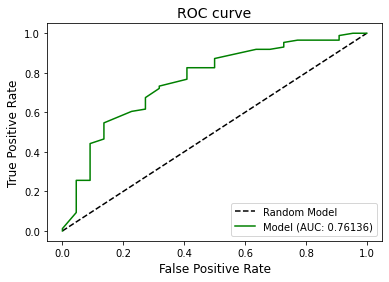

In [71]:
# Question 5 : ROC Curve/KS Values

from optbinning.scorecard.plots import plot_ks, plot_auc_roc
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score,precision_recall_curve

# Subset 1 logistic

# Predicted Probability
test_pred1 = log1.predict_proba(x1_test1)[:,1]

plot_auc_roc(y1_test1,test_pred1)



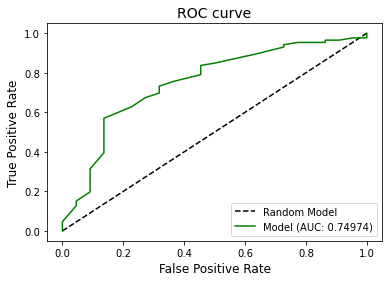

In [101]:
# Subset 1 linear

# Predicted Probability
test_pred2 = lin2.predict(x1_test1)

plot_auc_roc(y1_test1,test_pred2)

In [102]:
from scipy.stats import ks_2samp
import numpy as np


In [106]:
ks11 = ks_2samp(y1_test1['Good'], test_pred1)
ks11

KstestResult(statistic=0.7962962962962963, pvalue=2.3489666885288875e-34)

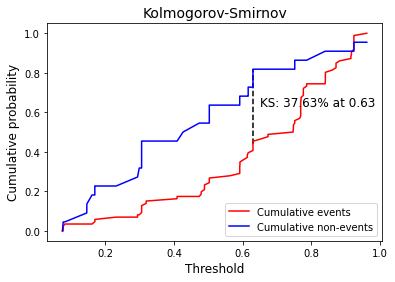

In [113]:
plot_ks(y1_test1,test_pred1)

In [114]:
test_pred1

array([0.48837226, 0.91473866, 0.56288923, 0.48837226, 0.88227279,
       0.59168369, 0.62959715, 0.77628708, 0.62959715, 0.50244577,
       0.478779  , 0.92350338, 0.87145885, 0.14563552, 0.07474889,
       0.50244577, 0.65220252, 0.60224763, 0.62959715, 0.30536107,
       0.96100693, 0.76856921, 0.7658118 , 0.59111324, 0.1459295 ,
       0.07706421, 0.1609414 , 0.74736348, 0.40882746, 0.92350338,
       0.50244577, 0.30536107, 0.3186052 , 0.42584334, 0.61565392,
       0.478779  , 0.74736348, 0.76856921, 0.29840444, 0.84045377,
       0.29355097, 0.61313397, 0.62959715, 0.77628708, 0.16912102,
       0.59111324, 0.76954488, 0.50244577, 0.77628708, 0.59111324,
       0.84013696, 0.3186052 , 0.61313397, 0.92350338, 0.62959715,
       0.16912102, 0.30536107, 0.76856921, 0.169453  , 0.78591261,
       0.74639114, 0.87145885, 0.92350338, 0.92350338, 0.29355097,
       0.74691749, 0.92350338, 0.30536107, 0.07723229, 0.86047027,
       0.76856921, 0.87145885, 0.59168369, 0.40825703, 0.84045

In [ ]:
df1=df[["HomeTeam","HBP"]]
df1.rename(columns={'HomeTeam':'Team','HBP':'Point'}, inplace=True)
df2=df[["AwayTeam","ABP"]]
df2.rename(columns={'AwayTeam':'Team','ABP':'Point'}, inplace=True)
dfair = pd.concat([df1,df2])

dfair = dfair.groupby('Team').sum().reset_index()
dfair.sort_values('Point', ascending=True)

result = dfair.groupby(["Team"])['Point'].aggregate('sum').reset_index().sort_values('Point')
sns.barplot(x='Point', y="Team", data=dfair, order=result['Team'])
plt.show()


ax.set_xlabel("Fair Play Points", fontsize = 15)
ax.set_ylabel("Teams", fontsize = 15)